In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [3]:
def generate_time_series_data(num_points):
    t = np.linspace(0, 10, num_points)
    data = np.sin(t) + 0.1 * np.random.randn(num_points)
    return data


In [5]:
num_points = 1000
data = generate_time_series_data(num_points)

In [6]:
sequence_length = 10
X = []
y = []

In [8]:
for i in range(num_points - sequence_length):
    X.append(data[i: i + sequence_length])
    y.append(data[i + sequence_length])

In [10]:
X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)

In [12]:
train_ratio = 0.8

train_size = int(train_ratio * len(X))
X_train, X_test = X[: train_size], X[train_size: ]
y_train, y_test = y[: train_size], y[train_size: ]
model = Sequential()

model.add(LSTM(units = 50, input_shape = (sequence_length, 1)))

In [14]:
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.2)

Epoch 1/20
20/20 [==============================] - 2s 20ms/step - loss: 0.3496 - val_loss: 0.1061
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.0115
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0115
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0104
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0104
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.0113
Epoch 8/20
20/20 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0101
Epoch 9/20
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0102
Epoch 10/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.0110
Epoch 11/20
20/20 

In [16]:
loss = model.evaluate(X_test, y_test)

print(f"Test loss: {loss:.4f}")

predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0146
Test loss: 0.0146
7/7 [==============================] - 0s 2ms/step


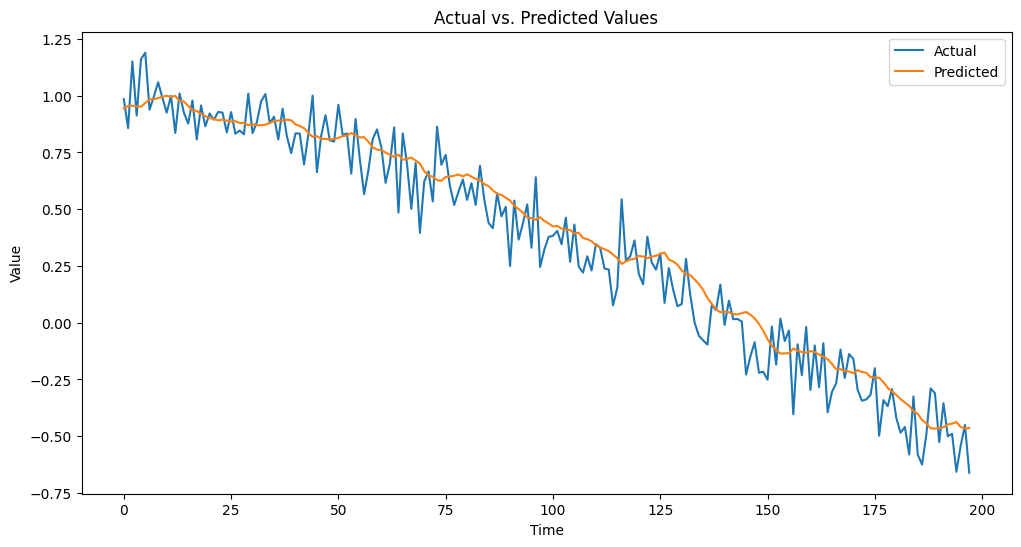

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, label = 'Actual')
plt.plot(predictions, label = 'Predicted')
plt.legend()

plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()